<a href="https://colab.research.google.com/github/evcereti/Aprendiendo_ML_y_DS/blob/main/K_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K-means clustering en el plano cartesiano

El clustering mediante K Means se usa para agrupar un conjunto de datos d-dimensinales de entrada, en k subconjuntos de salida, según una regla de proximidad dada.

En este primer notebook nos limitaremos al caso de puntos en el plano cartesiano y con la regla de distancia usual en R^2.

En vez de ir directamente a la literatura para establecer el método de una vez por todas, mas bien se seguirá un procedimiento iterativo para llegar de forma natural a la solución.

##Primera aproximación al modelo. Firma de la función k-means

Empezamos por definir la firma de nuestra función kmeans que contenga la logica de nuestro algoritmo.

Una primera aproximación al programa a desarrollar sería definir una función kmeans que tome un numero entero k y regrese K números reales que representarán los centroides de cada nueva región en el mapa.

```
def kmeans(k: int) -> List[int, int]: pass
```

## Primera aproximación a los datos

Las regiones por generar en el mapa no son aleatorias, mas bien, se escogeran según "la población" de puntos que recibiremos como entrada. Esto es analogo a escoger la frontera de paises en el globo basado en la cantidad de población de cada lugar.

Dado que los datos de entrada deben tener cierta distribución que refleje las regiones que queremos generar, es útil importar una librería que genere dicha distribución.

Escogemos make_blobs() de scikit-learn. Usando esta herramienta, vamos a generar distintos datasets que serán de utilidad durante la construcción del algoritmo.

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt


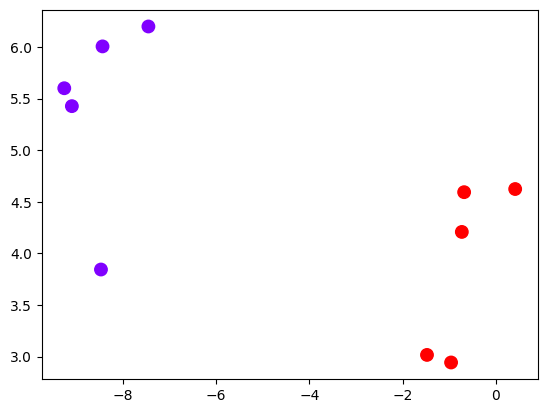

In [2]:
X1, y1 = make_blobs(n_samples=10, centers=2, n_features=2, random_state=7)
plt.scatter(X1[:, 0], X1[:, 1], c=y1, s=80, cmap='rainbow')

In [7]:
X1

array([[-8.4747246 ,  3.84365154],
       [-0.95735545,  2.94277902],
       [-7.45617621,  6.19887436],
       [-1.47456445,  3.01606214],
       [-9.09926319,  5.42682758],
       [-0.726516  ,  4.20794714],
       [-0.67723506,  4.59318446],
       [ 0.41888432,  4.62363909],
       [-9.26275724,  5.60044142],
       [-8.44101405,  6.00589213]])

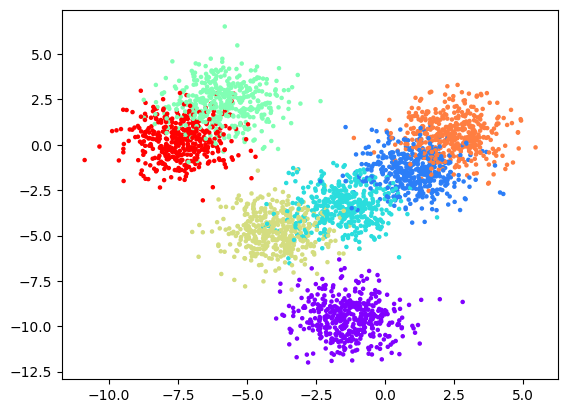

In [3]:
X2, y2 = make_blobs(n_samples=3000, centers=7, n_features=2, random_state=2)
plt.scatter(X2[:, 0], X2[:, 1], c=y2, s=5, cmap='rainbow')

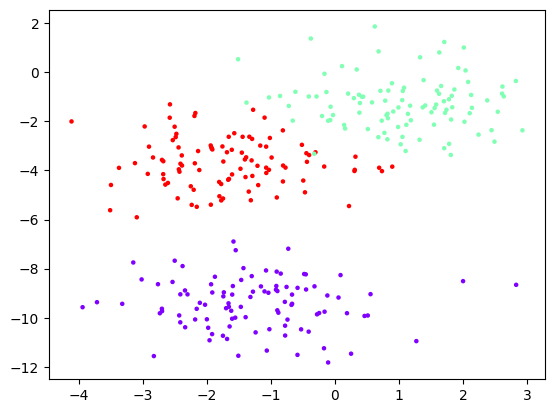

In [4]:
X3, y3 = make_blobs(n_samples=300, centers=3, n_features=2, random_state=2)
plt.scatter(X3[:, 0], X3[:, 1], c=y3, s=5, cmap='rainbow')

## Segunda aproximacion al modelo

Como primera mejora a nuestro modelo podemos añadir la matriz X a nuestra función, además de contruir un objeto posicion que defina nuestras coordenadas en el mapa.


```
class Coord:
  def __init__(self, pos_x, pos_y):
    self.x = pos_x
    self.y = pos_y
  def get_coord(self):
    return [self.x, self.y]

def kmeans(k: int, X: List[Coord]) -> List[Coord]: pass
```

En este modelo, la función toma una lista de coordenadas que representa nuestra muestra experimental y un entero k de subconjuntos objetivo. Como resultado se obtiene una lista de k coordenadas de los centroides de nuestras regiones.

Es una característica de los algoritmos de K Means que el número k no se puede calcular usando la muestra. Por esto, el calculo de K se obtiene a través de un previo conocimiento de los datos combinado con prueba y error.

```
def kmeans(k: int, X: List[Coord]) -> List[Coord]:
  rng = np.random.default.rng(seed=42)
  k_random_indices = rng.choice(len(X), size=k, replace=False)
  centroids = X[k_random_indices]
```

Se propone que para inicializar los centroides se escojan aleatoriamente k elementos de X. De esta manera garantizamos que los centroides inicien dentro del dominio correcto. Esta elección ya garantiza una correcta elección del centroid para el caso idealizado de k=1 y nula dispersion de los datos.

## Tercera aproximación al modelo. La clase KMeans

Dado que en ML es típico diseñar el modelo de solucion en la forma

```
model = model()
model.fit()
```

como tercera aproximación se propone la siguiente modificación

```
class Coord:
  def __init__(self, pos_x, pos_y):
    self.x = pos_x
    self.y = pos_y

  def get_coord(self):
    return (self.x, self.y)

class KMeans:
  def __init__(self, k: int, X: List[Coord]) -> None:
    self.k = k
    self.X = X
    self.centroids = self.initialize_centroids()

  def initialize_centroids(self):
    rng = np.random.default_rng(seed=42)
    random_indices = rng.choice(len(self.X), size=self.k, replace=False)
    centroids = []
    for i in random_indices:
      p = self.X[i]
      centroids.append(Coord(p.x, p.y))
    return centroids

  def fit(self) -> KMeans:
    pass
```

En este punto, aun no definimos como calcular las mejoras iterativas en la posición de los centroides, sin embargo sabemos que fit() debe devolver una instancia de clase KMeans.

## Segunda aproximación a los datos

De la definición de la función de blob(), sabemos que para nuestro primer ejemplo k=3. Con esto en mente, podemos superponer una primer hipótesis en nuestro mapa.

Como primer hipótesis propondremos una distribución "creciente" de los datos, por lo que nuestros 3 puntos los podemos ubicar de manera equidistante en el mapa con las funciones min(), max() y avg().

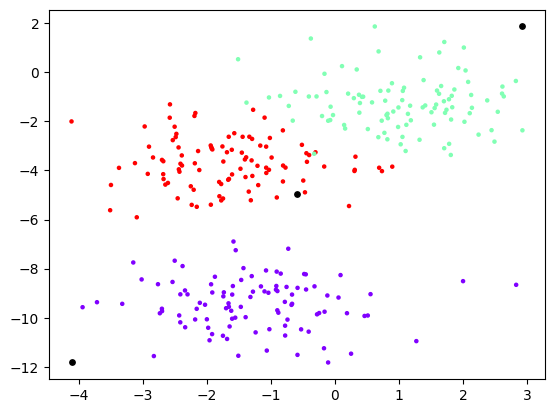

In [5]:
plt.scatter(X3[:, 0], X3[:, 1], c=y3, s=5, cmap='rainbow')
max_x = max(X3[:,0])
min_x = min(X3[:,0])
max_y = max(X3[:,1])
min_y = min(X3[:,1])
avg_x = (max_x+min_x)/2
avg_y = (max_y+min_y)/2
plt.scatter(max_x, max_y, c='black', s=15)
plt.scatter(min_x, min_y, c='black', s=15)
plt.scatter(avg_x, avg_y, c='black', s=15)

Rapidamente notamos que no es tan mala aproximación para este caso particular, donde los 3 grupos de coordenadas "parecieran" coincidir con los puntos que hemos elegido.

Por sencillez, usaremos estos puntos y este conjunto para probar nuestra mecanismo de minimización de error.

## Cuarta aproximacion al modelo. Calculo de la distancia

Uno de los objetivos por lograr es que nuestro modelo calcule la distancia entre los k centroides y los puntos de la muestra.

Dado que los puntos de nuestra muestra están en el plano cartesiado, lo mejor es utilizar la distancia clásica en R^2.

$d(v,w) = || v - w || = \sqrt{(v_x - w_x)^2 + (v_y - w_y)^2}$

Dado que esta es una operación entre pares de vectores, lo mejor es agruparla en la clase Coord:

```
class Coord:
  def __init__(self, pos_x, pos_y):
    self.x = pos_x
    self.y = pos_y

  def get_coord(self) -> [int, int]:
    return (self.x, self.y)

  def get_distance(self, p: Coord) -> Double:
    v_x, v_y = self.get_coord()
    w_x, w_y = p.get_coord()
    s1 = w_x - v_x
    s2 = w_y - v_y
    return math.sqrt( s1**2 + s2**2 )
```
Ahora que tenemos una manera de calcular la distancia entre dos pares de coordenadas, lo siguiente que tenemos que hacer es calcularlas

```
class Coord:
  def __init__(self, pos_x, pos_y):
    self.x = pos_x
    self.y = pos_y

  def get_coord(self) -> [int, int]:
    return (self.x, self.y)

  def get_distance(self, p: Coord) -> Double:
    v_x, v_y = self.get_coord()
    w_x, w_y = p.get_coord()
    s1 = w_x - v_x
    s2 = w_y - v_y
    return math.sqrt( s1**2 + s2**2 )

class KMeans:
  def __init__(self, k: int, X: List[Coord]) -> None:
    self.k = k
    self.X = X
    self.centroids = self.initialize_centroids()

  def initialize_centroids(self):
    rng = np.random.default_rng(seed=42)
    random_indices = rng.choice(len(self.X), size=self.k, replace=False)
    centroids = []
    for i in random_indices:
      p = self.X[i]
      centroids.append(Coord(p.x, p.y))
    return centroids

  def fit(self) -> KMeans:
    pass
```

In [12]:
from typing import List
import numpy as np
import math

class Coord:
  def __init__(self, pos_x, pos_y):
    self.x = pos_x
    self.y = pos_y

  def get_coord(self):
    return (self.x, self.y)

  def get_distance(self, p: Coord) -> float:
    v_x, v_y = self.get_coord()
    w_x, w_y = p.get_coord()
    s1 = w_x - v_x
    s2 = w_y - v_y
    return math.sqrt( s1**2 + s2**2 )

class KMeans:
  def __init__(self, k: int, X: List[Coord]) -> None:
    self.k = k
    self.X = X
    self.centroids = self.initialize_centroids(self)

  def initialize_centroids(self):
    rng = np.random.default_rng(seed=42)
    random_indices = rng.choice(len(self.X), size=self.k, replace=False)
    centroids = []
    for i in random_indices:
      p = self.X[i]
      centroids.append(Coord(p.x, p.y))
    return centroids

  def fit(self) -> KMeans:
    pass


NameError: name 'KMeans' is not defined

In [9]:
for i in range(3):
  print(X1[i])


[-8.4747246   3.84365154]
[-0.95735545  2.94277902]
[-7.45617621  6.19887436]
